In [141]:
!python3.8 -m pip install pandas
!python3.8 -m pip install matplotlib
import pandas as pd

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.

In [142]:
tools = pd.read_csv('csv/tools.csv')

In [143]:
tools.head()

,barcode,name,description,purchase_date,purchase_price,shareable,username
0,123456789873,Wrench,Wrenches things,2022-10-20,0.05,True,rypat1
1,570001739943,COMBINATION RUBBER MALLET 16OZ,"Hammer, Dead Blow Fiberglass, Cushioned Grip",2021-06-03,15.99,True,bpl9915
2,444065967916,RIP HAMMER 20OZ,"Hammer, Claw",2020-10-30,28.99,True,bpl9915
3,652207625294,HICKORY HAMMER WITH SHAFT 22OZ,"Hammer, Non-Sparking",2017-04-08,37.99,True,bpl9915
4,549641108328,BRICK HAMMER 24OZ,"Hammer, Riveting",2018-04-18,39.99,True,bpl9915


In [144]:
tools.shape

(283, 7)

<AxesSubplot: title={'center': 'Fig 1. Tool Shareability'}>

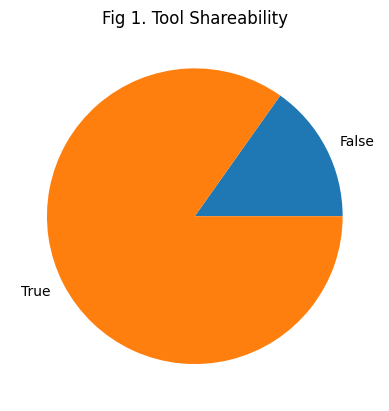

In [173]:
tools.groupby('shareable').shareable.count().plot.pie(title='Fig 1. Tool Shareability', ylabel='')

In [146]:
tool_reqs = pd.read_csv('csv/tool_reqs.csv')

In [147]:
tool_reqs.head()

,username,barcode,request_date,date_required,duration,status,last_status_change,expected_return_date,date_returned
0,bpl9915,123456789874,2022-10-25,2022-10-26,0 years 0 mons 1 days 0 hours 0 mins 0.0 secs,Accepted,2022-10-25,2023-10-10,2022-10-25
1,8con,182947899381,2022-10-22,2022-10-24,0 years 1 mons 0 days 0 hours 0 mins 0.0 secs,Accepted,2022-10-22,2023-10-22,2022-10-22
2,bpl9915,342074945909,2022-10-25,2022-10-26,0 years 0 mons 1 days 0 hours 0 mins 0.0 secs,Pending,NaN,NaN,NaN
3,Kodak,915812666574,2022-10-25,2022-10-30,0 years 0 mons 1 days 0 hours 0 mins 0.0 secs,Pending,NaN,NaN,NaN
4,Pirate,280032246370,2022-10-25,2022-10-30,0 years 0 mons 1 days 0 hours 0 mins 0.0 secs,Pending,NaN,NaN,NaN


In [148]:
users = pd.read_csv('csv/users.csv')

In [149]:
users.head()

,username,password_hash,first_name,last_name,email,creation_time,last_access
0,Toolguy87,$2b$12$5tXNQc/tNwbR.U.VJGFGKeJ4g3CdMsO9sMnXvtT...,John,Smith,jsmith@gmail.com,2022-10-25 14:43:47.794095,2022-10-25 14:43:47.794095
1,bpl9915,$2b$12$ZrEv99zBF8HiSL9AiMVvHef2FLv3ZWGQdrmSs3z...,Brett,Lubberts,bpl9915@rit.edu,2022-10-18 15:33:01.000000,2022-10-28 15:14:07.214511
2,Atom,$2b$12$YaJ2N2LKYL.hVK6hgPkd0ezxzr/kdmdbXh0KCjK...,Adam,Harnish,afh9608@rit.edu,2022-10-18 15:33:45.000000,2022-11-04 10:34:34.512710
3,Soap,$2b$12$ZY3ilr1wHm0CuMvVtyYEru5KAupQGtCqFIBIsPk...,John,MacTavish,jtav@uk.com,2022-10-25 14:45:54.763000,2022-10-25 14:45:54.763982
4,Price,$2b$12$eLhQFv/EEiUYFg7p8NTK2ezJnnTTfSR8Jevp0DW...,John,Price,jprice@uk.com,2022-10-25 15:42:51.000000,2022-10-25 15:42:55.000000


In [150]:
tool_categs = pd.read_csv('csv/tool_categs.csv')

In [151]:
tool_categs.head()

,barcode,cid
0,204067281627,50
1,642039897514,50
2,244867639338,50
3,342074945909,50
4,313720313733,50


In [152]:
categories = pd.read_csv('csv/categories.csv')

In [153]:
categories.head()

,cid,name,username
0,16,Wrenches,Atom
1,17,Drills,Atom
2,18,Sledges,Atom
3,19,Shovels,Atom
4,20,Axes,Atom


<AxesSubplot: title={'center': 'Fig 2. Average Price by Category this Year (2022)'}, xlabel='Category', ylabel='Average Purchase Price ($)'>

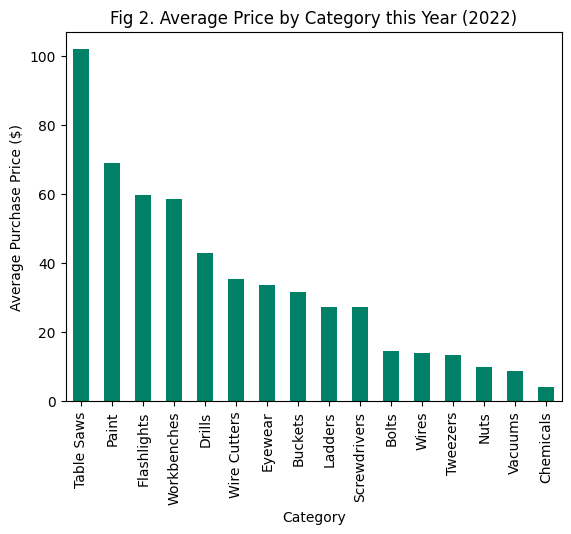

In [174]:
df = pd.merge(pd.merge(pd.merge(tool_reqs, tool_categs, on='barcode', how='outer'), categories, on='cid', how='outer'), tools, on='barcode', how='outer')
df[df['purchase_date'] > '2022-01-01'].groupby('name_x').purchase_price.mean().sort_values(ascending=False).plot.bar(xlabel='Category', ylabel='Average Purchase Price ($)', title='Fig 2. Average Price by Category this Year (2022)', colormap='summer')

/var/folders/97/g2678f6s4097y1pprp46rbrr0000gn/T/ipykernel_55160/1799399657.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['description'] = df2['description'].str.replace('Maker: ', '')


<AxesSubplot: title={'center': 'Fig 3. Average Price by Toolmaker'}, xlabel='Maker', ylabel='Average Price ($)'>

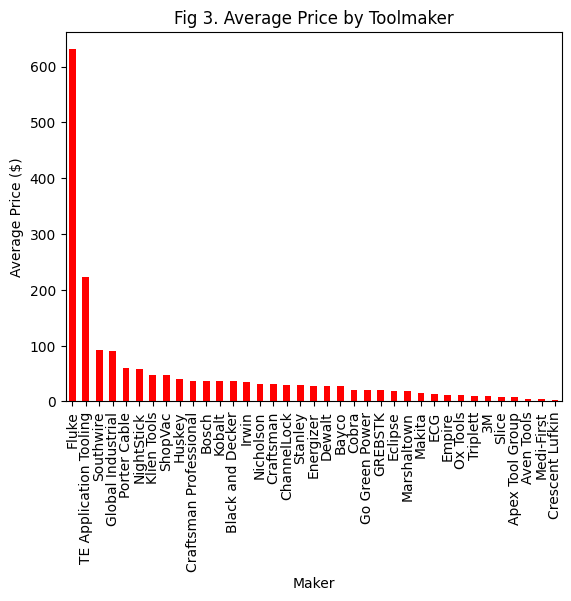

In [175]:
df2 = tools[tools['description'].str.startswith('Maker: ', na=False)]
df2['description'] = df2['description'].str.replace('Maker: ', '')
df2.groupby('description').purchase_price.mean().sort_values(ascending=False).plot.bar(xlabel='Maker', ylabel='Average Price ($)', title='Fig 3. Average Price by Toolmaker', colormap='autumn')